# Results of Edge Detection Benchmark and Speedup

By: Jonathan Dela Cruz

## Serial Experiment

I compiled the serial code on a 2020 MacBook Air M1 Chip on macOS Ventura 13.2 using the following commands:

```
make main_process.o
make png_util.o
make process
```

In ran the code 10 times by timing the executable file given from our process command and obtained the following results

###Put your results here (maybe plot them if it seems appropriate)###

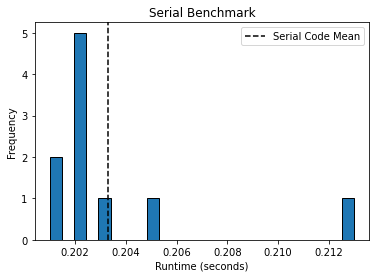

In [39]:
import matplotlib.pyplot as plt
import numpy as np

serial = [0.205, 0.202, 0.213, 0.202, 0.202, 0.203, 0.202, 0.201, 0.202, 0.201]
plt.hist(serial, bins=25, edgecolor='black')
plt.title("Serial Benchmark")
plt.xlabel("Runtime (seconds)")
plt.ylabel("Frequency")
plt.axvline(np.mean(serial), color='black', linestyle='dashed', label="Serial Code Mean")
plt.legend()

## Code Optimization

###Describe changes you made to the code to try and make it go faster### 

* Optimizing Code: We can add optimization flags to instruct our compiler to set some optimizations for the code. These optimization flags can significantly improve our runtime performance
* Altering the Loop Order: The code provided gave nested for loops for our average filter, gradient filter, and thresholding tasks that loops through each pixel in our image's width and then loops through each pixel in our image's height. By simply changing the order of the for loops can improve the runtime of our code. 

Show your timing results as either a table or a graph.

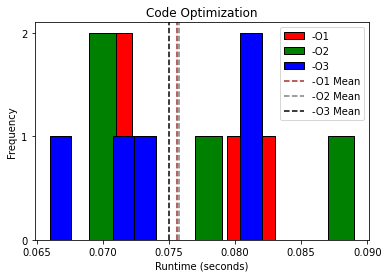

In [37]:
O1_optimization = [0.080, 0.083, 0.071, 0.073, 0.071]
O2_optimization = [0.089, 0.070, 0.073, 0.078, 0.069]
O3_optimization = [0.082, 0.071, 0.082, 0.074, 0.066]

plt.hist(O1_optimization, bins=10, color='red', edgecolor='black', label='-O1')
plt.hist(O2_optimization, bins=10, color='green', edgecolor='black', label='-O2')
plt.hist(O3_optimization, bins=10, color='blue', edgecolor='black', label='-O3')

plt.yticks([0, 1, 2], ['0', '1', '2'])
plt.title("Code Optimization")
plt.xlabel("Runtime (seconds)")
plt.ylabel("Frequency")

plt.axvline(np.mean(O1_optimization), color='brown', linestyle='dashed', label="-O1 Mean")
plt.axvline(np.mean(O2_optimization), color='grey', linestyle='dashed', label="-O2 Mean")
plt.axvline(np.mean(O3_optimization), color='black', linestyle='dashed', label="-O3 Mean")
plt.legend()

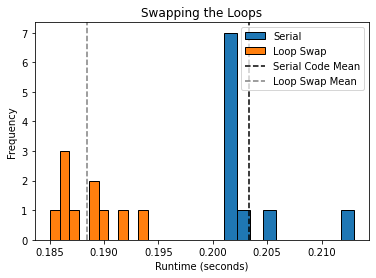

In [43]:
loop_swap = [0.194, 0.190, 0.186, 0.186, 0.186, 0.187, 0.189, 0.185, 0.192, 0.189]

plt.hist(serial, bins=10, edgecolor='black', label='Serial')
plt.hist(loop_swap, bins=10, edgecolor='black', label='Loop Swap')
plt.title("Swapping the Loops")
plt.xlabel("Runtime (seconds)")
plt.ylabel("Frequency")
plt.axvline(np.mean(serial), color='black', linestyle='dashed', label="Serial Code Mean")
plt.axvline(np.mean(loop_swap), color='grey', linestyle='dashed', label="Loop Swap Mean")
plt.legend()

## OpenMP Speedup

###Describe what you did to speed up your code using OpenMP###

* #pragma omp parallel for: This allows for multiple threads to access different parts of the iteration process to split up the work
* #pragma omp parallel for collapse: This combines multiple loops into a single loop, allowing for easier distribution among the threads. Instead of having nested loops, this directive treats the loops as one big loop with n^2 iterations. 
* scheduling: This is a directive that tells the loop how to deal out the iterations of the loop

Show your timing results as either a table or a graph.

In [52]:
import pandas as pd

benchmark = [0.162, 0.168, 0.177, 0.182, 0.155]
static = [0.203, 0.204, 0.201, 0.213, 0.201]
dynamic = [0.209, 0.177, 0.211, 0.208, 0.177]
auto = [0.166, 0.195, 0.186, 0.199, 0.200]

openmp = {
    'Runs': ['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5', 'Average'],
    'Benchmark': benchmark + [np.mean(benchmark)],
    'Static': static + [np.mean(static)],
    'Dynamic': dynamic + [np.mean(dynamic)],
    'Auto': auto + [np.mean(auto)],
}
pd.DataFrame(openmp)

,Runs,Benchmark,Static,Dynamic,Auto
0,Run 1,0.1620,0.2030,0.2090,0.1660
1,Run 2,0.1680,0.2040,0.1770,0.1950
2,Run 3,0.1770,0.2010,0.2110,0.1860
3,Run 4,0.1820,0.2130,0.2080,0.1990
4,Run 5,0.1550,0.2010,0.1770,0.2000
5,Average,0.1688,0.2044,0.1964,0.1892


In [53]:
benchmark2 = [0.074, 0.072, 0.077, 0.063, 0.079]
static2 = [0.075, 0.077, 0.068, 0.076, 0.070]
dynamic2 = [0.199, 0.186, 0.185, 0.197, 0.196]
auto2 = [0.079, 0.074, 0.073, 0.071, 0.071]

collapse = {
    'Runs': ['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5', 'Average'],
    'Benchmark': benchmark2 + [np.mean(benchmark2)],
    'Static': static2 + [np.mean(static2)],
    'Dynamic': dynamic2 + [np.mean(dynamic2)],
    'Auto': auto2 + [np.mean(auto2)],
}
pd.DataFrame(collapse)

,Runs,Benchmark,Static,Dynamic,Auto
0,Run 1,0.074,0.0750,0.1990,0.0790
1,Run 2,0.072,0.0770,0.1860,0.0740
2,Run 3,0.077,0.0680,0.1850,0.0730
3,Run 4,0.063,0.0760,0.1970,0.0710
4,Run 5,0.079,0.0700,0.1960,0.0710
5,Average,0.073,0.0732,0.1926,0.0736


## Concluding Discussion

###Describe what you learned during this process, what worked, what didn't work, where did you have trouble and what you learned###

During the process of trying to improve our serial code's runtime, I learned there is a lot of trial and error when trying to parallelize code. While there are a lot of different methods to speed up code, not all of them may be appropriate. Certain code may be more optimized to be parallelized in different methods. Going through this specific code I tried doing a reduction for the for loops, but that didn't really work, so I just stuck to the basics. While I thought for sure a reduction would work, it ended up not being the best course of action for our code. I ended up using a collapse for our nested for loops so the threads could more effectively split up the work in the loops. The most difficult parts of the process was adapting on the fly when one method wouldn't behave the way you anticipated

----